In [1]:
import pandas as pd
import numpy as np
#import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw=pd.read_csv("CREDITRISK_RAW.csv",sep=',', delimiter=";")

In [3]:
def isNaN(num):
    return num != num


In [4]:
import locale
categorical_features=["GENERO","NIV_EDUC","E_CIVIL","CIUDAD","Aval","PAGA"]
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
d={}
result=pd.DataFrame()
for feature in data_raw.columns:
    temp=[]
    if not feature in categorical_features:
        if data_raw[feature].dtype == 'O':
            for i in range(data_raw.shape[0]):
                if (isNaN(data_raw[feature] [i]) or data_raw[feature] [i]==' '):
                    temp.append(0)
                elif type(data_raw[feature] [i]) is str:
                    temp.append(int(locale.atof(data_raw[feature] [i])))
            d[feature] = temp
        else:
            for i in range(data_raw.shape[0]):
                if (isNaN(data_raw[feature] [i])):
                    temp.append(0)
                else:
                    temp.append(data_raw[feature][i])
            d[feature] = temp
result = pd.DataFrame(d)
for feature in categorical_features:
    d[feature]=pd.get_dummies(data_raw[feature],prefix=feature)
    result = pd.concat([result, d[feature]], axis=1, sort=False)
del result['PAGA_NO PAGA']
del result['ID']

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

train,test = train_test_split(result, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(train.drop(['PAGA_PAGA'], axis=1), train['PAGA_PAGA'])
pred=clf.predict(test.drop(['PAGA_PAGA'], axis=1))

In [6]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(test['PAGA_PAGA'], pred))

,0,1
0,189,40
1,34,196


In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(test['PAGA_PAGA'], pred)

0.8387799564270153

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
print("EStadisticas RENTA:\n")
print(result["RENTA"].describe())
print("\nThe median of the Housing Price is: ", result["RENTA"].median(axis = 0))

EStadisticas RENTA:

count    2.294000e+03
mean     1.730736e+06
std      2.263083e+06
min      0.000000e+00
25%      5.000000e+05
50%      8.000000e+05
75%      1.579750e+06
max      9.940000e+06
Name: RENTA, dtype: float64

The median of the Housing Price is:  800000.0


NameError: name 'Paga' is not defined

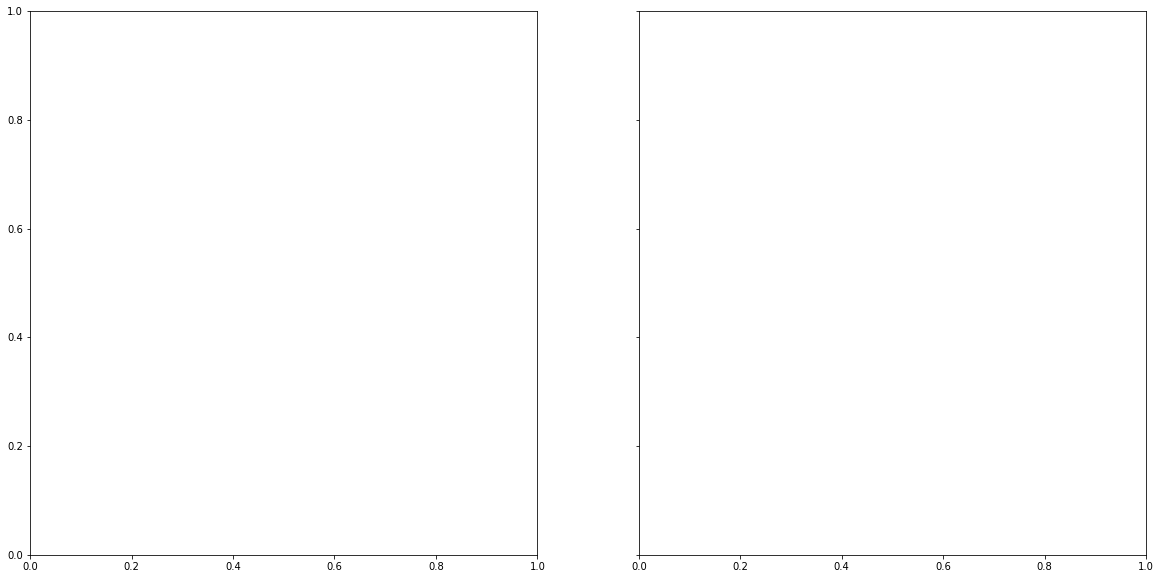

In [9]:
fig, ax = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,10))
sns.distplot(Paga["RENTA"], kde = True, color = 'r', hist_kws={'alpha': 0.4}, ax=ax[0],axlabel ="Paga")
sns.distplot(NoPaga["RENTA"], kde = True, color = 'b', hist_kws={'alpha': 0.4},ax=ax[1],axlabel ="No Paga")

In [10]:
data_raw.columns.shape[0]-len(categorical_features)

14

NameError: name 'Paga' is not defined

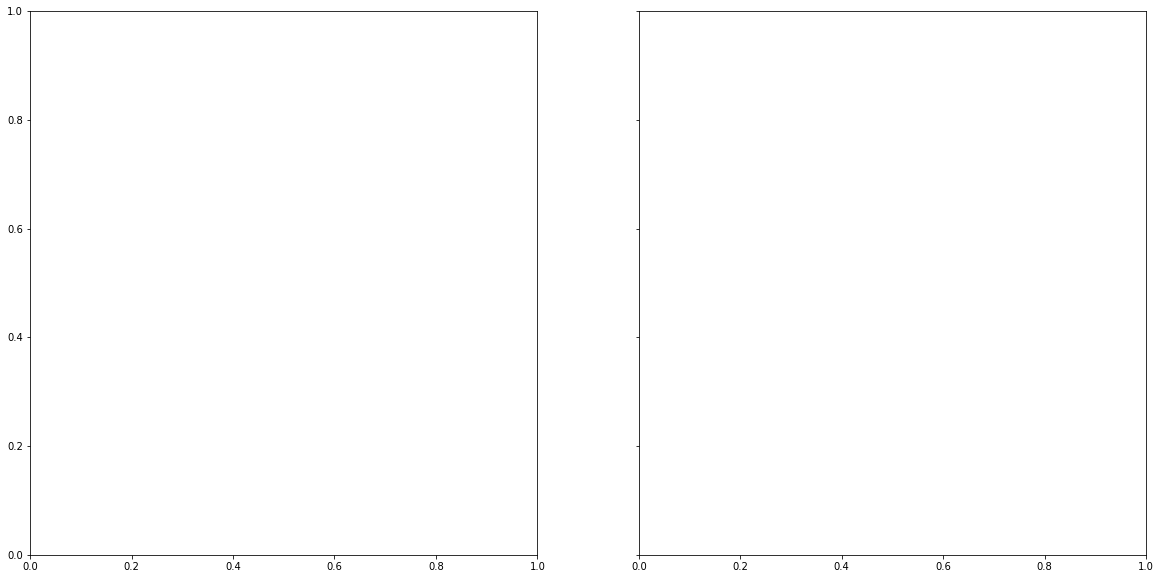

In [11]:
fig, ax = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,10))
sns.distplot(Paga["EDAD"], kde = True, color = 'r', hist_kws={'alpha': 0.4}, ax=ax[0],axlabel ="Paga")
sns.distplot(NoPaga["EDAD"], kde = True, color = 'b', hist_kws={'alpha': 0.4},ax=ax[1],axlabel ="No Paga")

In [ ]:
fig, ax = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,10))
sns.distplot(Paga["COD_OFI"], kde = True, color = 'r', hist_kws={'alpha': 0.4}, ax=ax[0],axlabel ="Paga")
sns.distplot(NoPaga["COD_OFI"], kde = True, color = 'b', hist_kws={'alpha': 0.4},ax=ax[1],axlabel ="No Paga")

In [ ]:
fig, ax = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,10))
sns.distplot(Paga["COD_COM"], kde = True, color = 'r', hist_kws={'alpha': 0.4}, ax=ax[0],axlabel ="Paga")
sns.distplot(NoPaga["COD_COM"], kde = True, color = 'b', hist_kws={'alpha': 0.4},ax=ax[1],axlabel ="No Paga")

In [ ]:
fig, ax = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,10))
sns.distplot(Paga["Monto solicitado"], kde = True, color = 'r', hist_kws={'alpha': 0.4}, ax=ax[0],axlabel ="Paga")
sns.distplot(NoPaga["Monto solicitado"], kde = True, color = 'b', hist_kws={'alpha': 0.4},ax=ax[1],axlabel ="No Paga")

In [ ]:
fig, ax = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,10))
sns.distplot(Paga["Días de Mora"], kde = True, color = 'r', hist_kws={'alpha': 0.4}, ax=ax[0],axlabel ="Paga")
sns.distplot(NoPaga["Días de Mora"], kde = True, color = 'b', hist_kws={'alpha': 0.4},ax=ax[1],axlabel ="No Paga")

In [ ]:
fig, ax = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,10))
sns.distplot(Paga["Monto Deuda Promedio"], kde = True, color = 'r', hist_kws={'alpha': 0.4}, ax=ax[0],axlabel ="Paga")
sns.distplot(NoPaga["Monto Deuda Promedio"], kde = True, color = 'b', hist_kws={'alpha': 0.4},ax=ax[1],axlabel ="No Paga")

In [ ]:
fig, ax = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,10))
sns.distplot(Paga["Número de meses inactivo"], kde = True, color = 'r', hist_kws={'alpha': 0.4}, ax=ax[0],axlabel ="Paga")
sns.distplot(NoPaga["Número de meses inactivo"], kde = True, color = 'b', hist_kws={'alpha': 0.4},ax=ax[1],axlabel ="No Paga")

In [ ]:
fig, ax = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,10))
sns.distplot(Paga["numero de cuotas"], kde = True, color = 'r', hist_kws={'alpha': 0.4}, ax=ax[0],axlabel ="Paga")
sns.distplot(NoPaga["numero de cuotas"], kde = True, color = 'b', hist_kws={'alpha': 0.4},ax=ax[1],axlabel ="No Paga")

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1',random_state=0, solver='liblinear').fit(train.drop(['PAGA_PAGA'], axis=1), train['PAGA_PAGA'])
pred=clf.predict(test.drop(['PAGA_PAGA'], axis=1))
accuracy_score(test['PAGA_PAGA'], pred)